# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

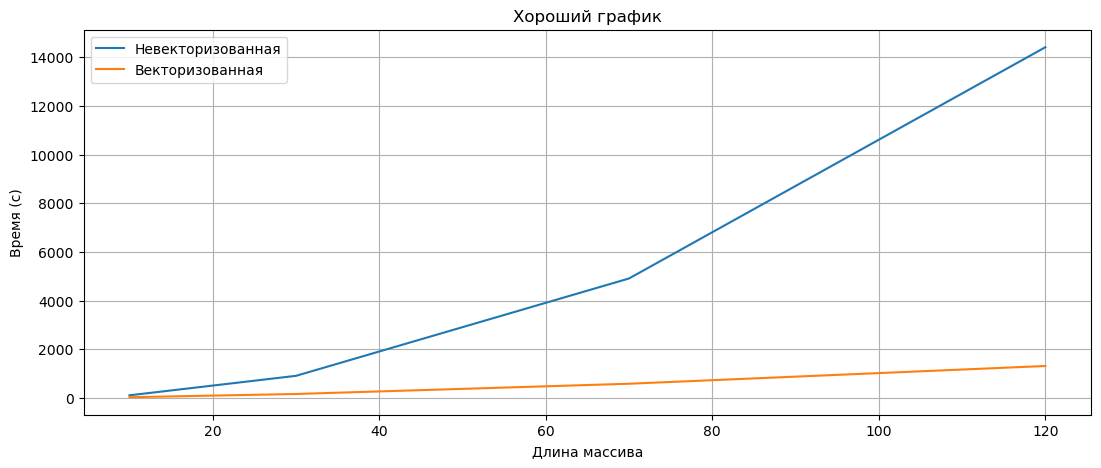

In [4]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, ax2 = plt.subplots(1, 1, figsize=(13, 5))

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

plt.show()

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

c:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


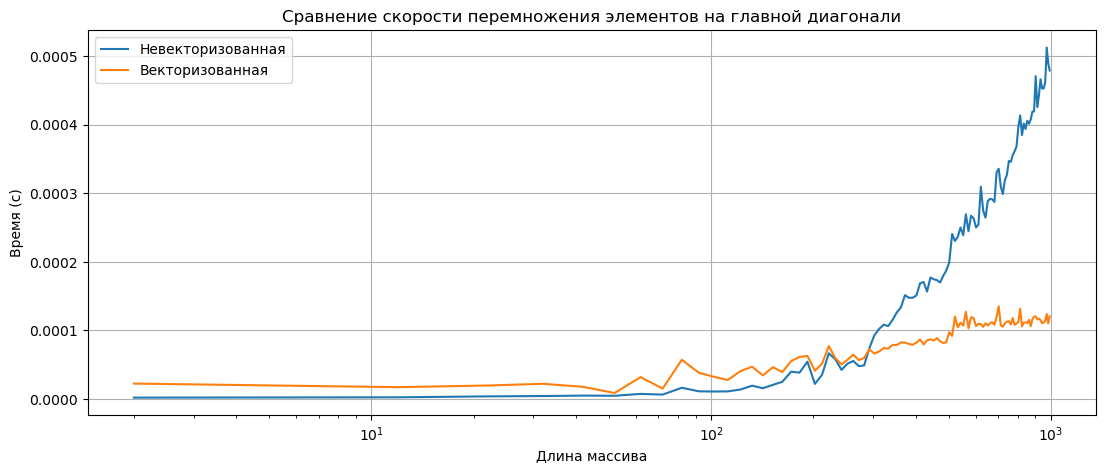

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_matrix_list(n):
    matrix = []
    for i in range(n):
        row = []
        for j in range(n):
            row.append(random.uniform(0,10))
        matrix.append(row)
    return matrix

def diagonal_product_numpy(matrix):
    diagonal = np.diag(matrix)
    non_zero_elements = diagonal[diagonal != 0]
    return np.prod(non_zero_elements)
def diagonal_product(matrix):
    n = 1
    for i in range(0,len(matrix)):
        if (matrix[i] != 0):
            n *= matrix[i][i]
    return n

def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 10
while(n < 1000):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        matrix = generate_matrix_list(n)
        start = time.time()
        val1 = diagonal_product(matrix)
        time_non_vectorized[-1] += time.time() - start
        matrix = np.array(matrix)
        start = time.time()
        val2 = diagonal_product_numpy(matrix)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 10
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Сравнение скорости перемножения элементов на главной диагонали")





 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


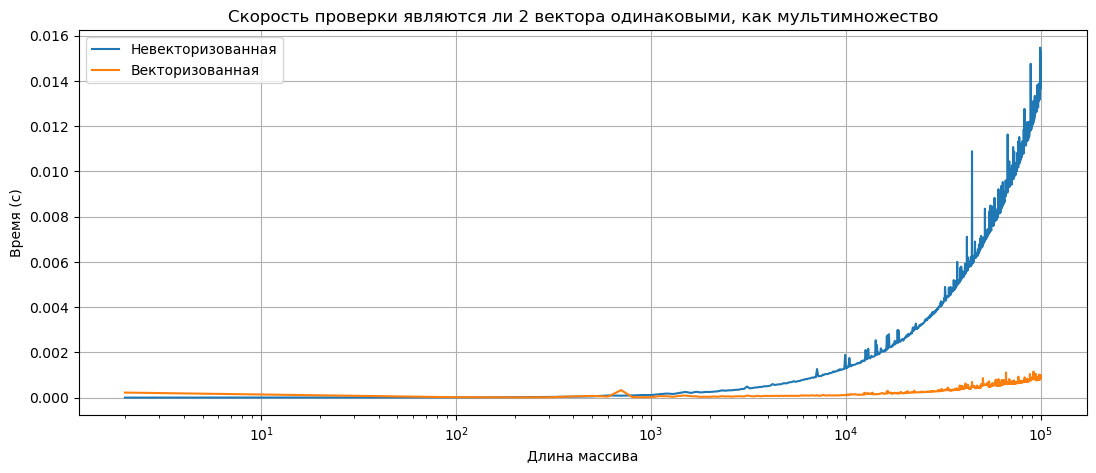

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_2list(n):
    ls1 = []
    ls2 = []
    for i in range(n):
        ls1.append(random.randint(1,100))
        ls2.append(random.randint(1,100))
    return ls1,ls2

def are_same_multiset_vec(arr1, arr2):
    sorted1 = np.sort(arr1)
    sorted2 = np.sort(arr2)
    return np.array_equal(sorted1, sorted2)

def are_same_multiset(arr1, arr2):
    sorted(arr1)
    sorted(arr2)
    return arr1 == arr2


def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 1
while(n < 100000):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        arr1,arr2 = generate_2list(n)
        start = time.time()
        val1 = are_same_multiset(arr1,arr2)
        time_non_vectorized[-1] += time.time() - start
        arr1,arr2 = np.array(arr1),np.array(arr2)
        start = time.time()
        val2 = are_same_multiset_vec(arr1,arr2)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 100
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Скорость проверки являются ли 2 вектора одинаковыми, как мультимножество")


* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

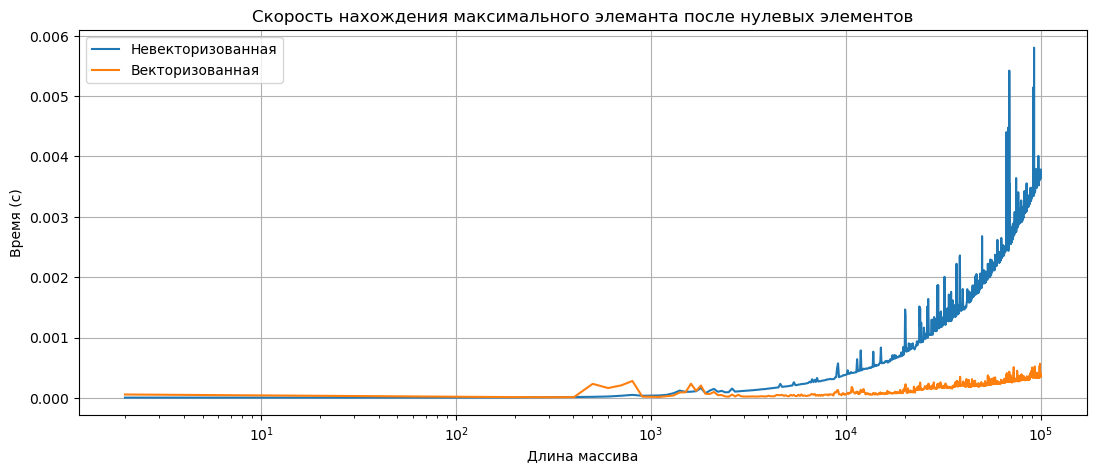

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import time
import sys
import random

def generate_list(n):
    ls = []
    ls.append(0)
    for i in range(n - 1):
        ls.append(random.randint(0,30))
    return ls

def max_after_zero_vec(arr):
    zero_indicator = 1 - np.sign(np.abs(arr[:-1]))
    # Применяем маску к элементам после нулей
    elements_after_zeros = arr[1:] * zero_indicator
    # Находим максимальный элемент (игнорируя нули, которые не были после настоящих нулей)
    # Добавляем -inf чтобы гарантировать корректную работу при отсутствии элементов
    return np.max(np.concatenate([elements_after_zeros, [-np.inf]]))

def max_after_zero(arr):
    res = -1
    for i in range(len(arr) - 1):
        if arr[i] == 0:
            res = max(res,arr[i + 1])
    return res
    


def draw_graph(data_size,time_non_vectorized,time_vectorized , name):
    f, ax2 = plt.subplots(1, 1, figsize=(13, 5))
    ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
    ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
    ax2.set_title(name)
    ax2.set_xscale("log", base=10)
    ax2.set_xlabel(u"Длина массива")
    ax2.set_ylabel(u"Время (с)")
    ax2.grid()
    ax2.legend()
    plt.show()

n = 2
data_size = []
time_non_vectorized = []
time_vectorized = []
COUNT = 1
while(n < (100000)):
    data_size.append(n)
    time_non_vectorized.append(0)
    time_vectorized.append(0)
    for i in range(0,COUNT):
        arr = generate_list(n)
        start = time.time()
        val1 = max_after_zero(arr)
        time_non_vectorized[-1] += time.time() - start
        arr = np.array(arr)
        start = time.time()
        val2 = max_after_zero_vec(arr)
        time_vectorized[-1] += time.time() - start
        if val2 != val1:
            print(val1,val2)
            sys.exit(1)
    time_vectorized[-1] /= COUNT
    time_non_vectorized[-1] /=COUNT
    n += 100
draw_graph(data_size,time_non_vectorized,time_vectorized,u"Скорость нахождения максимального элеманта после нулевых элементов")

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

In [ ]:
# code here

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

In [ ]:
# code here

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here